<a href="https://colab.research.google.com/github/DarkWorldCoder/LearningAI/blob/master/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2024-01-25 17:08:55--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.03s   

2024-01-25 17:08:55 (17.0 MB/s) - ‘sentiment_train’ saved [447555/447555]



In [3]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("sentiment_train",delimiter="\t")
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


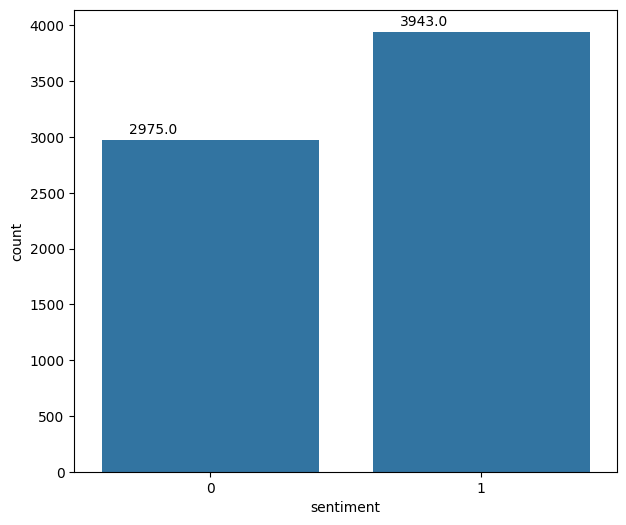

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))

ax = sns.countplot(x="sentiment",data=train_df)

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+0.1,p.get_height()+50))


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df["text"])

features = cv.get_feature_names_out()

print(features)

['00' '007' '10' ... 'zach' 'zen' 'µª']


In [6]:
train_df_features = cv.transform(train_df["text"])

In [7]:
train_df_features.getnnz()

65398

In [8]:
train_df2 = pd.DataFrame(train_df_features.todense(),columns=features)

In [9]:
train_df2.iloc[0:2,150:150]

""
0
1


In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

In [11]:
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [12]:
my_stop_words = list(my_stop_words.union(["harry","potter","code","vinci","mountian","movie"]))
my_stop_words

['two',
 'fill',
 'you',
 'often',
 'where',
 'of',
 'per',
 'them',
 'thereafter',
 'move',
 'find',
 'cant',
 're',
 'three',
 'these',
 'why',
 'much',
 'latter',
 'side',
 'through',
 'other',
 'thus',
 'well',
 'at',
 'become',
 'third',
 'had',
 'take',
 'neither',
 'becomes',
 'whereupon',
 'please',
 'everything',
 'toward',
 'formerly',
 'fifty',
 'system',
 'it',
 'con',
 'describe',
 'put',
 'full',
 'front',
 'amongst',
 'except',
 'and',
 'movie',
 'again',
 'from',
 'anyhow',
 'between',
 'due',
 'never',
 'he',
 'former',
 'into',
 'anywhere',
 'himself',
 'one',
 'or',
 'least',
 'anything',
 'few',
 'therein',
 'which',
 'your',
 'whereas',
 'seeming',
 'elsewhere',
 'hasnt',
 'many',
 'always',
 'to',
 'hence',
 'there',
 'him',
 'themselves',
 'ltd',
 'towards',
 'either',
 'five',
 'see',
 'same',
 'next',
 'bottom',
 'alone',
 'than',
 'becoming',
 'along',
 'forty',
 'whole',
 'whatever',
 'without',
 'beside',
 'co',
 'top',
 'found',
 'an',
 'perhaps',
 'twenty'

In [13]:
cv = CountVectorizer(max_features=10000,stop_words=my_stop_words)
feature_vector = cv.fit(train_df["text"])
features = cv.get_feature_names_out()

train_df_features = cv.transform(train_df["text"])
feature_counts = np.sum(train_df_features.toarray(),axis=0)
feature_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

,features,counts
398,da,2001
1165,mountain,2000
223,brokeback,2000
1072,love,1624
126,awesome,1127
1148,mission,1094
890,impossible,1093
1033,like,974
1642,sucks,602
1640,sucked,600


In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop

In [15]:
cv = CountVectorizer(max_features=1000,analyzer=stem_words)
feature_vector = cv.fit(train_df["text"])
features = cv.get_feature_names_out()

train_df_features = cv.transform(train_df["text"])

feature_counts = np.sum(train_df_features.toarray(),axis=0)
feature_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

,features,counts
143,da,1982
80,brokeback,1930
439,mountain,1930
298,harri,1916
408,love,1837
802,suck,1378
922,wa,1142
43,awesom,1116
434,mission,1090
346,imposs,1090


In [16]:
train_df3 = pd.DataFrame(train_df_features.todense(),columns=features)
train_df3["sentiment"] = train_df["sentiment"]


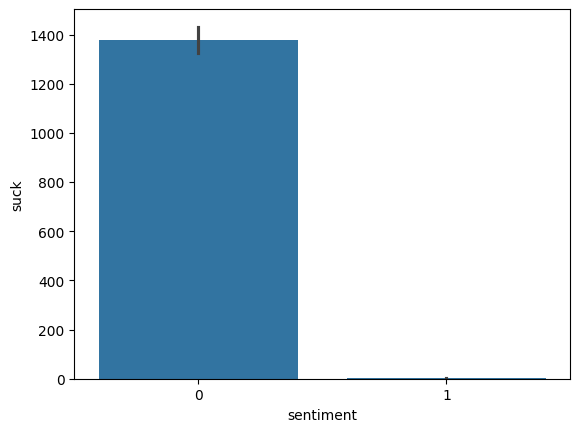

In [17]:
sns.barplot(x="sentiment",y="suck",data=train_df3,estimator=sum)
plt.show()

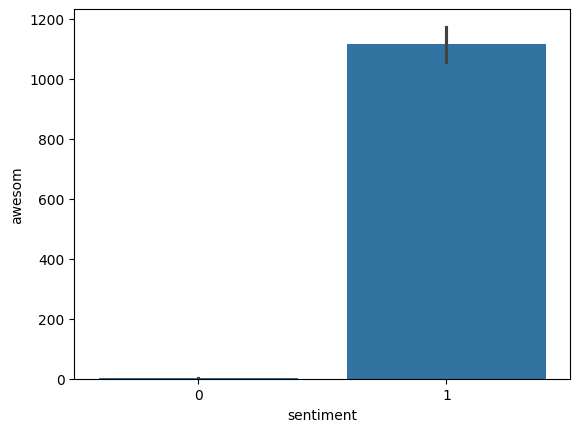

In [18]:
sns.barplot(x="sentiment",y="awesom",data=train_df3,estimator=sum)
plt.show()

In [19]:
cv = CountVectorizer(max_features=1000)

feature_vector= cv.fit(train_df["text"])

features = cv.get_feature_names_out()
train_df_features = cv.transform(train_df["text"])
feature_counts = np.sum(train_df_features.toarray(),axis=0)
featute_count_df = pd.DataFrame(dict(features=features,counts=feature_counts))

feature_count_df.sort_values("counts",ascending=False).head(10)

,features,counts
143,da,1982
80,brokeback,1930
439,mountain,1930
298,harri,1916
408,love,1837
802,suck,1378
922,wa,1142
43,awesom,1116
434,mission,1090
346,imposs,1090


TFIDF Vectorizer


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=stem_words,max_features=100)

feature_vector = tfidf.fit(train_df["text"])
train_df_features = tfidf.transform(train_df["text"])
features = feature_vector.get_feature_names_out()

In [27]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df.sentiment,test_size=0.3,random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(),y_train)
y_pred = gaussian.predict(X_test.toarray())


In [36]:
from nltk.stem import PorterStemmer
import nltk
import re
nltk.download('punkt')
stemmer = PorterStemmer()

def get_stemmed_tokens(document):
  all_tokens = [word for word in nltk.tokenize.word_tokenize(document)]
  clean_text = []

  for each_token in all_tokens:
    if re.search('[a-zA-z]',each_token):
      clean_text.append(each_token)
  stem_token = [stemmer.stem(t) for t in clean_text]
  return stem_token


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [37]:
tfidf = TfidfVectorizer(tokenizer=get_stemmed_tokens,max_features=1000)
feature_vector = tfidf.fit(train_df["text"])

train_df_features = tfidf.transform(train_df["text"])
features = feature_vector.get_feature_names_out()

In [38]:
features

array(["'d", "'ll", "'m", "'re", "'s", "'ve", "'yeah", '-and', '-da',
       '-have', '-the', '-we', '6th', '[', ']', '_', '``', 'a', 'aaron',
       'abl', 'about', 'absolut', 'absurd', 'academi', 'accept',
       'accompani', 'ach', 'acn', 'act', 'action', 'actor', 'actual',
       'admir', 'ador', 'adult', 'after', 'again', 'against', 'ago',
       'agre', 'aka', 'all', 'almost', 'along', 'alreadi', 'also',
       'although', 'alway', 'am', 'amaz', 'an', 'and', 'ang', 'angel',
       'angl', 'ani', 'anim', 'aniwa', 'answer', 'anu', 'anyhow', 'anyon',
       'anyth', 'anyway', 'anywher', 'ap', 'apart', 'apolog', 'appar',
       'appeal', 'archiv', 'are', 'arena', 'argument', 'around', 'articl',
       'as', 'asian', 'ask', 'asleep', 'ass', 'at', 'attempt', 'attract',
       'audrey', 'author', 'aw', 'award', 'awesom', 'awesomest', 'b',
       'back', 'bad', 'ball', 'ban', 'bang', 'basic', 'be', 'bean',
       'beat', 'beauti', 'becaus', 'becom', 'been', 'befor', 'begin',
       'beli